# Capstone project

### OkCupid data

The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…


### Load in the DataFrame

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import time

In [2]:
df = pd.read_csv("profiles.csv")
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# Only three columns contained continuous values
df.describe()

,age,height,income
count,4407.000000,4407.000000,4407.000000
mean,33.656229,68.171999,30913.777400
std,11.143680,4.005943,118782.596822
min,18.000000,43.000000,-1.000000
25%,25.000000,65.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,40.000000,71.000000,20000.000000
max,69.000000,95.000000,1000000.000000


### Data exploration

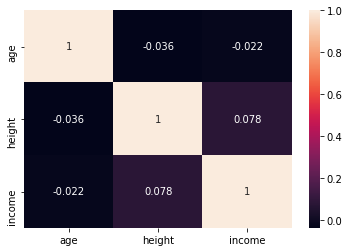

In [3]:
Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [4]:
df.job.head()

0                   transportation
19    science / tech / engineering
22          executive / management
94     artistic / musical / writer
98          executive / management
Name: job, dtype: object

In [5]:
df.education.value_counts()

graduated from college/university    1739
graduated from masters program        699
working on college/university         572
graduated from two-year college       184
graduated from high school            170
working on two-year college           132
working on masters program            128
dropped out of college/university     120
graduated from ph.d program           100
graduated from law school              91
dropped out of space camp              71
graduated from space camp              64
working on ph.d program                62
working on space camp                  48
college/university                     47
graduated from med school              37
dropped out of two-year college        21
working on law school                  20
dropped out of masters program         18
two-year college                       16
working on med school                  16
dropped out of high school             15
working on high school                 12
dropped out of ph.d program       

In [6]:
df.job.value_counts()

other                                634
student                              460
artistic / musical / writer          414
science / tech / engineering         357
sales / marketing / biz dev          352
medicine / health                    338
computer / hardware / software       336
education / academia                 296
executive / management               209
entertainment / media                191
banking / financial / real estate    153
hospitality / travel                 132
construction / craftsmanship         105
law / legal services                 104
clerical / administrative             94
political / government                66
transportation                        40
unemployed                            38
rather not say                        34
retired                               33
military                              21
Name: job, dtype: int64

### Data visualization

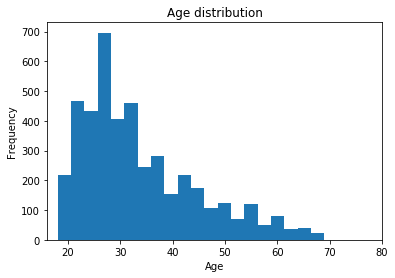

In [7]:
plt.hist(df.age, bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()


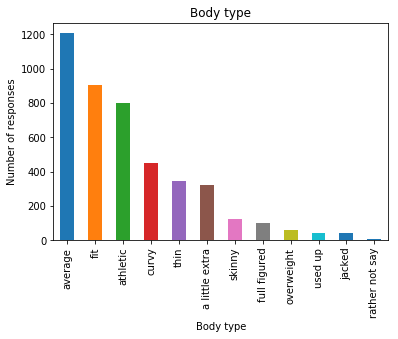

In [8]:
body_type = pd.value_counts(df['body_type'].values, sort=True)

ax = body_type.plot(kind='bar', title='Body type')
ax.set(xlabel='Body type', ylabel='Number of responses')
plt.show()

### Question

I would like to explore the correlation between `smoke`, `drugs` abuse and `body_type`. I would like to understand if `age` can be predicted by `smoke`, `drinking` and `drugs` use.

### Augment Dataset
In order to understand the correlations, these values need to be mapped:

In [9]:
smokes_mapping = {"no": 0, "trying to quit": 1, "when drinking": 2, "sometimes": 3, "yes": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)

drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)


This is the first value I would like to predict:

In [10]:
body_type_mapping = {'fit': 1,'thin': 2, 'average': 3,'athletic': 0,'curvy': 5,'a little extra': 4}

# Drop values that are not very relevant in number
to_drop = ['skinny','full figured','overweight','jacked','used up','rather not say']
df = df[~df['body_type'].isin(to_drop)]

df["body_type_code"] = df.body_type.map(body_type_mapping)
set(df.body_type.values)

{'a little extra', 'athletic', 'average', 'curvy', 'fit', 'thin'}

In [11]:
set(df[~df['body_type'].isin(to_drop)].body_type)

{'a little extra', 'athletic', 'average', 'curvy', 'fit', 'thin'}

### Data normalization


In order to get accurate results, numerical data should have the same weight.

In [12]:
from sklearn.preprocessing import MinMaxScaler

features_data = df[["drugs_code", "smokes_code"]]


In [13]:
x = features_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

features_data = pd.DataFrame(x_scaled, columns=features_data.columns)
features_data_clean = np.array(features_data)[0:4000, :]


bodyType = df[["body_type_code"]]
bodyType_clean = np.array(bodyType)[0:4000, :]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
features_data_clean.shape
bodyType_clean.shape

(4000, 1)

In [15]:
features_data_clean[:10]

array([[0.  , 0.75],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.5 , 0.  ],
       [0.5 , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.5 ],
       [0.  , 0.  ],
       [1.  , 0.75],
       [0.  , 0.  ]])

In [16]:
len(bodyType_clean)

4000

### Classification Techniques

In [17]:
from sklearn.model_selection import train_test_split

# Preparation of the train and test arrays
X_train, X_test, y_train, y_test = train_test_split(features_data_clean, bodyType_clean, train_size=0.8, test_size=0.2, random_state = 100)


In [18]:
X_train.shape

(3200, 2)

#### Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB

# Predicting body type from smoke and drugs abuse using Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train.ravel())

print(classifier.score(X_test, y_test))


0.305


#### K-nearest Neighbors Classifier

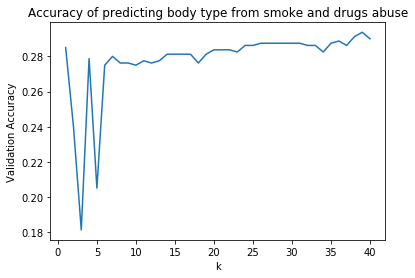

--- 0.930509090423584 seconds ---


In [20]:
start_time = time.time()


from sklearn.neighbors import KNeighborsClassifier

accuracies = []
k_list = list(range(1,41))

for k in range(1,41):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train.ravel())
    accuracies.append(classifier.score(X_test, y_test.ravel()))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy of predicting body type from smoke and drugs abuse")
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

classifier = KNeighborsClassifier(21)
classifier.fit(X_train, y_train.ravel())
print(format(classifier.score(X_test, y_test.ravel())))

print("accuracy score: %s" %accuracy_score(y_test.ravel(), classifier.predict(X_test)))
print("recall score: %s" %recall_score(y_test.ravel(), classifier.predict(X_test), average=None))
print("precision score: %s" %precision_score(y_test.ravel(), classifier.predict(X_test), average=None))


0.04
accuracy score: 0.04
recall score: [0.         0.23076923 0.05263158 0.         0.         0.03030303
 0.42857143 0.         0.03773585 0.08695652 0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0625     0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
precision score: [0.         0.03947368 0.03333333 0.         0.         0.01470588
 0.04147465 0.         0.05714286 0.06557377 0.         0.33333333
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.2        0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
classifier.classes_

array([0, 1, 2, 3, 4, 5])

### Regression Techniques

In [23]:
features_data = df[['drinks_code','drugs_code','smokes_code']]

x = features_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns=features_data.columns)
#feature_data_step = np.array(feature_data[~np.isnan(feature_data).any(axis=1)])
feature_data_clean = np.array(feature_data)[0:4000, :]


age = df[["age"]]
#age_step = np.array(age[~np.isnan(age).any(axis=1)])
age_clean = np.array(age)[0:4000, :]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data_clean, age_clean, test_size=0.2, random_state=42)

#### Linear regression

training set score: 0.05245891834008776
test set score: 0.05780374119899245


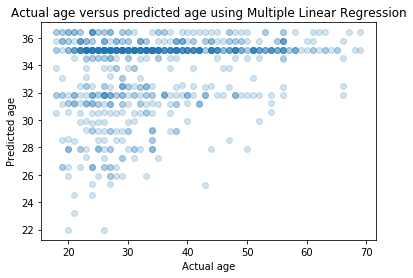

In [27]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, y_train.ravel())

regr_training_score = regr.score(X_train, y_train.ravel())

print("training set score: %s" %regr_training_score)

regr_test_score = regr.score(X_test, y_test.ravel())

print("test set score: %s" %(regr_test_score))

#generate plot showing difference between predicted age and actual age using Multiple Linear Regression model

regr_predictions = regr.predict(X_test)

plt.scatter(y_test, regr_predictions, alpha=0.2)
plt.title("Actual age versus predicted age using Multiple Linear Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

#### K-Nearest Neighbor regression model

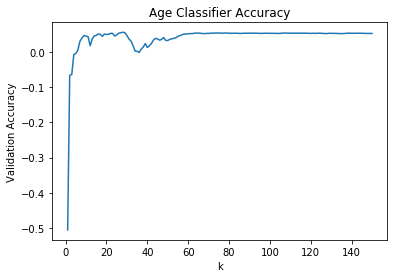

--- 15.753209114074707 seconds ---


In [26]:
from sklearn.neighbors import KNeighborsRegressor

start_time = time.time()


k_list = range(1, 151)
scores = []
for k in k_list:
    # Create a K-Neighbor Classifier
    regressor = KNeighborsRegressor (n_neighbors = k)

    # Train using training dataset
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    scores.append(regressor.score(X_train, y_train))

# Plot "k" vs "accuracy"
plt.plot(k_list, scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Age Classifier Accuracy')
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))
